<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/StatewisePolitics/Gujarat/BJPGujrat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/raishagun/Election-Prediction.git

Cloning into 'Election-Prediction'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 452 (delta 12), reused 0 (delta 0), pack-reused 415
Receiving objects: 100% (452/452), 21.38 MiB | 38.75 MiB/s, done.
Resolving deltas: 100% (179/179), done.


In [4]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler


access_token="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret="cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

consumer_key="DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret="jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)  # authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-11-01"  #Date from which you need to extract tweets
date2 = "2020-11-22"  #Date till when you need to extract tweets

date =[]
user_id = []
verified = []
text = []
user = []
location = []
source = []
likes = []
followers = []
following = []
retweets = []

def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2,tweet_mode = 'extended').items():
        print(tweet.created_at)  #Date at which it was tweet
        date.append(tweet.created_at)
        print(tweet.id)          #Unique ID of tweet
        user_id.append(tweet.id)
        print(tweet.user.verified)   #If user who tweet is verified or not
        verified.append(tweet.user.verified)
        print(tweet.full_text)   #To get full text of the tweet
        text.append(tweet.full_text)
        print(tweet.user.screen_name)  #User screen name
        user.append(tweet.user.screen_name)
        print(tweet.user.location)     #Location from where the tweet came
        location.append(tweet.user.location)
        print(tweet.source)            #Which twitter application was used to tweet
        source.append(tweet.source)
        print(tweet.favorite_count)     #Number of likes on the tweet
        likes.append(tweet.favorite_count)
        print(tweet.user.followers_count)    #Number of followers of the user
        followers.append(tweet.user.followers_count)
        print(tweet.user.friends_count)      #Number of following by the user
        following.append(tweet.user.friends_count)
        print(tweet.retweet_count)               #Number of the retweets of the original tweet
        retweets.append(tweet.retweet_count)
    
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"bjp gujrat"+" -filter:retweets") #Filtering out retweets to avoid duplication

data = list(zip(date,user_id,verified,text,user,location,source,likes,followers,following,retweets))
df = pd.DataFrame(data =data, columns =["Date","Tweet_id","Verified","Tweet",
                                   "User","Location","Source","Likes","Followers","Following","Retweets"])

           
df.to_csv('bjp_gujrat.csv',index = False)

2020-11-21 17:13:01
1330197537739993091
False
Uttrakhand Election
BJP - 70(Total Seats) - 31(Won)
Congress - 70(Total Seats) - 32(Won)

Uttar Pradesh Election
BJP - 398(Total Seats) - 47(Won)
Congress - 355(Total Seats) - 28(Won)

Gujrat Election total Seats - 182
BJP - 115(Won)
Congress - 61(Won)
Harishc94614675

Twitter Web App
0
1
63
0
<--------------------------------------------------->
1
2020-11-21 16:52:11
1330192296390881282
False
@SaketGokhale @PriyankKharge Yes in 2014 when his was in-charge of UP , he got 73/80. In 2019 it was Bengal which made history. Maharashtra, Bihar, Karnataka, MP ,Haryana .. BJP managed to become  single largest party. Retained Gujrat. But for Saketji , our ULTRA youth leader should be the PM.
bhasad__
Mumbai
Twitter for Android
14
4
135
0
<--------------------------------------------------->
2
2020-11-21 16:48:25
1330191345596706818
False
@84nanikiran @varunsankineni @KTRTRS @BJP4Telangana @BJYM4Andhra @SanggitaT @Arvindharmapuri @bandisanjay_bjp @ar

In [5]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       156 non-null    datetime64[ns]
 1   Tweet_id   156 non-null    int64         
 2   Verified   156 non-null    bool          
 3   Tweet      156 non-null    object        
 4   User       156 non-null    object        
 5   Location   156 non-null    object        
 6   Source     156 non-null    object        
 7   Likes      156 non-null    int64         
 8   Followers  156 non-null    int64         
 9   Following  156 non-null    int64         
 10  Retweets   156 non-null    int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(4)
memory usage: 12.5+ KB


In [7]:
df.shape

(156, 11)

In [10]:
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S')) #Convert to date time format

In [11]:
df.dtypes

Date         datetime64[ns]
Tweet_id              int64
Verified               bool
Tweet                object
User                 object
Location             object
Source               object
Likes                 int64
Followers             int64
Following             int64
Retweets              int64
dtype: object

In [13]:
df.isnull().sum()

Date         0
Tweet_id     0
Verified     0
Tweet        0
User         0
Location     0
Source       0
Likes        0
Followers    0
Following    0
Retweets     0
dtype: int64

In [14]:
df['Source'].value_counts()

Twitter for Android    97
Twitter Web App        41
Twitter for iPhone     18
Name: Source, dtype: int64

In [15]:
df['Location'].nunique()

46

In [16]:
tweets_list = df['Tweet'].tolist()
len(tweets_list)

156

In [17]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)


155

In [18]:
tweets_list_updated  = list(tweets_list_updated)
type(tweets_list_updated)

list

In [19]:
df['Tweet'].duplicated().sum()

1

In [20]:
df = df.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df.shape

(155, 11)

In [21]:
df['Tweet'].duplicated().sum()

0

In [22]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['Processed_Tweet']=df.Tweet.apply(remove_emoji)

In [23]:
count=0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

0

In [24]:
df.shape

(155, 12)

In [25]:
df['Processed_Tweet']

0      Uttrakhand Election\nBJP - 70(Total Seats) - 3...
1      @SaketGokhale @PriyankKharge Yes in 2014 when ...
2      @84nanikiran @varunsankineni @KTRTRS @BJP4Tela...
3      @aajtak @journovidya BJP shall give real chall...
4      @aajtak @AkhileshPSingh @sambitswaraj @anjanao...
                             ...                        
150    @Noor__Maryam So don't blame Owaisi on Ur defe...
151    @zafarsareshwala @BJP4India This zameerfarosh ...
152    @rajkuma04775211 @AshwiniBJP Congress minister...
153    @zafarsareshwala @BJP4India Sir, You rightly s...
154    @gops33 In d 2017 Gujrat election results, Dho...
Name: Processed_Tweet, Length: 155, dtype: object

In [26]:
df['Processed_Tweet'] = [re.sub('^RT[\s]','',i) for i in df['Processed_Tweet']]  #Remove RT substring
df['Processed_Tweet']

0      Uttrakhand Election\nBJP - 70(Total Seats) - 3...
1      @SaketGokhale @PriyankKharge Yes in 2014 when ...
2      @84nanikiran @varunsankineni @KTRTRS @BJP4Tela...
3      @aajtak @journovidya BJP shall give real chall...
4      @aajtak @AkhileshPSingh @sambitswaraj @anjanao...
                             ...                        
150    @Noor__Maryam So don't blame Owaisi on Ur defe...
151    @zafarsareshwala @BJP4India This zameerfarosh ...
152    @rajkuma04775211 @AshwiniBJP Congress minister...
153    @zafarsareshwala @BJP4India Sir, You rightly s...
154    @gops33 In d 2017 Gujrat election results, Dho...
Name: Processed_Tweet, Length: 155, dtype: object

In [27]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df['Processed_Tweet']

0      Uttrakhand Election\nBJP - 70(Total Seats) - 3...
1          Yes in 2014 when his was in-charge of UP ,...
2                                BJP ruled States Are...
3          BJP shall give real challenge as Bengal wi...
4              BJP shall give real challenge as Benga...
                             ...                        
150      So don't blame Owaisi on Ur defeats too.\nWh...
151        This zameerfarosh will justify detention c...
152        Congress ministers of Maharastra and Gujra...
153        Sir, You rightly said that muslims are mos...
154      In d 2017 Gujrat election results, Dholka se...
Name: Processed_Tweet, Length: 155, dtype: object

In [28]:
df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']] #Remove urls
df['Processed_Tweet']

0      Uttrakhand Election\nBJP - 70(Total Seats) - 3...
1          Yes in 2014 when his was in-charge of UP ,...
2                                BJP ruled States Are...
3          BJP shall give real challenge as Bengal wi...
4              BJP shall give real challenge as Benga...
                             ...                        
150      So don't blame Owaisi on Ur defeats too.\nWh...
151        This zameerfarosh will justify detention c...
152        Congress ministers of Maharastra and Gujra...
153        Sir, You rightly said that muslims are mos...
154      In d 2017 Gujrat election results, Dholka se...
Name: Processed_Tweet, Length: 155, dtype: object

In [29]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag
df['Processed_Tweet']

0      Uttrakhand Election\nBJP - 70(Total Seats) - 3...
1          Yes in 2014 when his was in-charge of UP ,...
2                                BJP ruled States Are...
3          BJP shall give real challenge as Bengal wi...
4              BJP shall give real challenge as Benga...
                             ...                        
150      So don't blame Owaisi on Ur defeats too.\nWh...
151        This zameerfarosh will justify detention c...
152        Congress ministers of Maharastra and Gujra...
153        Sir, You rightly said that muslims are mos...
154      In d 2017 Gujrat election results, Dholka se...
Name: Processed_Tweet, Length: 155, dtype: object

In [30]:
!pip install tweet-preprocessor

In [31]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]
df['Processed_Tweet']

0      Uttrakhand ElectionBJP - (Total Seats) - (Won)...
1      Yes in when his was in-charge of UP , he got /...
2      BJP ruled States Are Filthy ? cities from Gujr...
3      BJP shall give real challenge as Bengal will o...
4      BJP shall give real challenge as Bengal will o...
                             ...                        
150    So don't blame Owaisi on Ur defeats too.What w...
151    This zameerfarosh will justify detention cente...
152    Congress ministers of Maharastra and Gujrat ha...
153    Sir, You rightly said that muslims are most pr...
154    In d Gujrat election results, Dholka seat was ...
Name: Processed_Tweet, Length: 155, dtype: object

In [32]:
#removing unnecessary special characters, numbers, punctuations in tweets
df.Processed_Tweet = df.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df["Processed_Tweet"]

0      Uttrakhand ElectionBJP    Total Seats     Won ...
1      Yes in when his was in charge of UP   he got  ...
2      BJP ruled States Are Filthy   cities from Gujr...
3      BJP shall give real challenge as Bengal will o...
4      BJP shall give real challenge as Bengal will o...
                             ...                        
150    So don t blame Owaisi on Ur defeats too What w...
151    This zameerfarosh will justify detention cente...
152    Congress ministers of Maharastra and Gujrat ha...
153    Sir  You rightly said that muslims are most pr...
154    In d Gujrat election results  Dholka seat was ...
Name: Processed_Tweet, Length: 155, dtype: object

In [33]:
df.Processed_Tweet = [low.lower() for low in df.Processed_Tweet] #Converting into lower case
df["Processed_Tweet"]

0      uttrakhand electionbjp    total seats     won ...
1      yes in when his was in charge of up   he got  ...
2      bjp ruled states are filthy   cities from gujr...
3      bjp shall give real challenge as bengal will o...
4      bjp shall give real challenge as bengal will o...
                             ...                        
150    so don t blame owaisi on ur defeats too what w...
151    this zameerfarosh will justify detention cente...
152    congress ministers of maharastra and gujrat ha...
153    sir  you rightly said that muslims are most pr...
154    in d gujrat election results  dholka seat was ...
Name: Processed_Tweet, Length: 155, dtype: object

In [34]:
df.Processed_Tweet =  df.Processed_Tweet.str.replace("amp", "")
df['Processed_Tweet'][12] #Sample tweet

'what about bjp ruling states like gujrat  himachal  up  bihar  haryana etc    are they failed to get top three position    '

In [35]:
df['User'].value_counts()

Arvind19802017     14
VasudevSeth         8
UddipanMondal1      5
UllooB              5
kabirazad2017       4
                   ..
gyan_stock          1
Mhleo               1
trimendiratta       1
Harishc94614675     1
taxfreebharat       1
Name: User, Length: 114, dtype: int64

In [36]:
df.query('User == "jacketrose86"').Processed_Tweet.tolist()

[]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


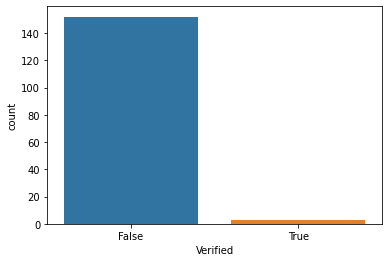

In [38]:
bar = sns.countplot(df['Verified'])

In [41]:
df['Verified'].value_counts()

False    152
True       3
Name: Verified, dtype: int64

In [42]:
df_verified = df.query('Verified == True')
df_verified['User'].value_counts()

SandhyaTudu        1
zafarsareshwala    1
BanglarGorboMB     1
Name: User, dtype: int64

In [43]:
days = df['Date'].dt.day.tolist()
no_of_days = Counter(days)
no_of_days

Counter({15: 15, 16: 28, 17: 19, 18: 19, 19: 11, 20: 33, 21: 30})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Day')

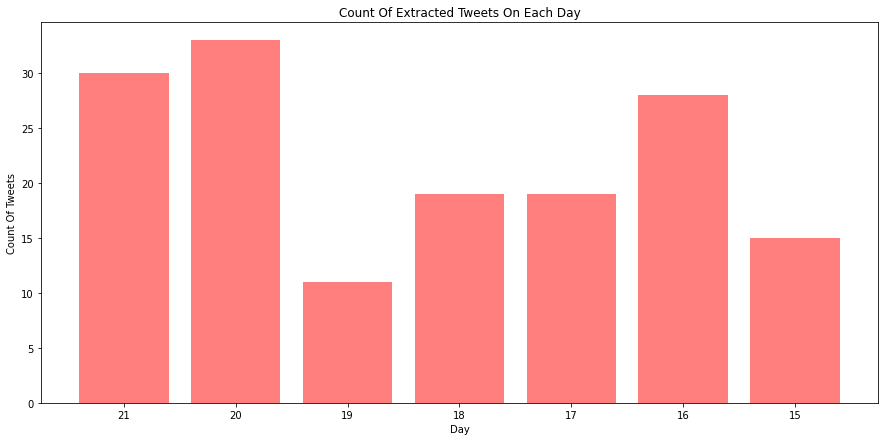

In [44]:
fig = plt.figure(figsize = (15,7))
plt.bar(range(len(no_of_days)), list(no_of_days.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_days)), list(no_of_days.keys()))
plt.xlabel("Day")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Day")

In [45]:
hours = df['Date'].dt.hour.tolist()
no_of_hours = Counter(hours)
no_of_hours

Counter({0: 2,
         1: 1,
         2: 2,
         3: 4,
         4: 7,
         5: 5,
         6: 8,
         7: 3,
         8: 4,
         9: 7,
         10: 4,
         11: 5,
         12: 13,
         13: 30,
         14: 12,
         15: 13,
         16: 8,
         17: 6,
         18: 11,
         19: 2,
         20: 7,
         21: 1})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Hour')

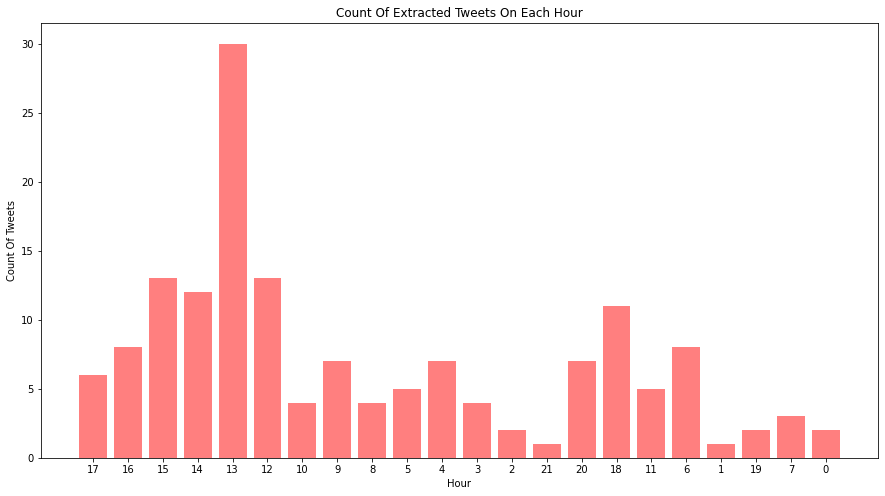

In [46]:
fig = plt.figure(figsize = (15,8))
plt.bar(range(len(no_of_hours)), list(no_of_hours.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_hours)), list(no_of_hours.keys()))
plt.xlabel("Hour")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Hour")

In [47]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()

In [48]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [49]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

['t', 'weren', 'don', 'very', 'she', 'can', 'was', 'until', 'ain', 'all', 'just', 'but', 'do', 'itself', 'its', "aren't", 'our', 'mustn', 'his', 's', 'what', 'after', 'not', 'isn', 'for', 'under', 'mightn', 'same', 'down', 'if', 'will', 'is', 'now', "it's", 'i', 'am', 'there', "you'll", 'haven', 'you', "that'll", 'between', 'further', "wouldn't", 'me', 'below', 'whom', 'them', 'because', 'by', 'with', 'ourselves', 'of', 'did', 'up', 'once', "mustn't", 'that', 'such', "she's", 'hadn', 'at', 've', 'own', 'their', 'on', 'shouldn', 'than', 'wasn', 'wouldn', 'hers', "you've", 'themselves', 'through', 'before', 'they', 'has', 're', "haven't", 'both', 'too', 'shan', "shouldn't", 'above', "don't", "hadn't", 'aren', 'theirs', 'where', "shan't", 'he', 'during', 'won', 'more', 'some', 'we', "didn't", "should've", 'against', 'off', 'nor', 'been', "needn't", 'other', 'only', 'as', 'an', 'had', 'does', 'into', 'ours', 'then', 'the', 'each', 'd', 'll', "you're", 'needn', 'most', 'having', 'your', "wo

In [50]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df['Processed_Tweet']

0      uttrakhand electionbjp total seats congress to...
1      yes charge got bengal made history maharashtra...
2      bjp ruled states filthy cities gujrat comes co...
3      bjp shall give real challenge bengal open rule...
4      bjp shall give real challenge bengal open rule...
                             ...                        
150    blame owaisi ur defeats strike rate seats biha...
151    zameerfarosh justify detention center muslims ...
152    congress ministers maharastra gujrat connectio...
153    sir rightly said muslims prosperous gujrat bjp...
154    gujrat election results dholka seat stolen bjp...
Name: Processed_Tweet, Length: 155, dtype: object

In [51]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df['Processed_Tweet']

0      [uttrakhand, electionbjp, total, seats, congre...
1      [yes, charge, got, bengal, made, history, maha...
2      [bjp, ruled, states, filthy, cities, gujrat, c...
3      [bjp, shall, give, real, challenge, bengal, op...
4      [bjp, shall, give, real, challenge, bengal, op...
                             ...                        
150    [blame, owaisi, ur, defeats, strike, rate, sea...
151    [zameerfarosh, justify, detention, center, mus...
152    [congress, ministers, maharastra, gujrat, conn...
153    [sir, rightly, said, muslims, prosperous, gujr...
154    [gujrat, election, results, dholka, seat, stol...
Name: Processed_Tweet, Length: 155, dtype: object

In [52]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df['Processed_Tweet']

0      [uttrakhand, electionbjp, total, seat, congres...
1      [ye, charg, got, bengal, made, histori, mahara...
2      [bjp, rule, state, filthi, citi, gujrat, come,...
3      [bjp, shall, give, real, challeng, bengal, ope...
4      [bjp, shall, give, real, challeng, bengal, ope...
                             ...                        
150    [blame, owaisi, ur, defeat, strike, rate, seat...
151    [zameerfarosh, justifi, detent, center, muslim...
152    [congress, minist, maharastra, gujrat, connect...
153    [sir, rightli, said, muslim, prosper, gujrat, ...
154    [gujrat, elect, result, dholka, seat, stolen, ...
Name: Processed_Tweet, Length: 155, dtype: object

In [53]:

df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet
0,2020-11-21 17:13:01,1330197537739993091,False,Uttrakhand Election\nBJP - 70(Total Seats) - 3...,Harishc94614675,,Twitter Web App,0,1,63,0,"[uttrakhand, electionbjp, total, seat, congres..."
1,2020-11-21 16:52:11,1330192296390881282,False,@SaketGokhale @PriyankKharge Yes in 2014 when ...,bhasad__,Mumbai,Twitter for Android,14,4,135,0,"[charg, got, bengal, made, histori, maharashtr..."
2,2020-11-21 16:48:25,1330191345596706818,False,@84nanikiran @varunsankineni @KTRTRS @BJP4Tela...,KirtanHora,India,Twitter for Android,0,75,319,0,"[bjp, rule, state, filthi, citi, gujrat, come,..."
3,2020-11-21 15:40:49,1330174333457666049,False,@aajtak @journovidya BJP shall give real chall...,VasudevSeth,,Twitter for Android,0,25,119,0,"[bjp, shall, give, real, challeng, bengal, ope..."
4,2020-11-21 15:40:36,1330174278688518147,False,@aajtak @AkhileshPSingh @sambitswaraj @anjanao...,VasudevSeth,,Twitter for Android,0,25,119,0,"[bjp, shall, give, real, challeng, bengal, ope..."
...,...,...,...,...,...,...,...,...,...,...,...,...
150,2020-11-15 14:02:42,1327975314069147648,False,@Noor__Maryam So don't blame Owaisi on Ur defe...,Amir_Khatana_,Jammu And Kashmir,Twitter for Android,0,1853,1149,0,"[blame, owaisi, defeat, strike, rate, seat, bi..."
151,2020-11-15 13:16:23,1327963660673839106,False,@zafarsareshwala @BJP4India This zameerfarosh ...,KhanSaheb_1,India,Twitter for Android,12,905,3407,3,"[zameerfarosh, justifi, detent, center, muslim..."
152,2020-11-15 12:30:33,1327952124735614976,False,@rajkuma04775211 @AshwiniBJP Congress minister...,veenadsharma45,,Twitter for Android,0,796,715,0,"[congress, minist, maharastra, gujrat, connect..."
153,2020-11-15 12:11:00,1327947206360399873,False,"@zafarsareshwala @BJP4India Sir, You rightly s...",AjayPremKaushal,"Jaipur, India",Twitter for Android,7,252,741,1,"[sir, rightli, said, muslim, prosper, gujrat, ..."


In [54]:
texts = []
texts = df.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

3054

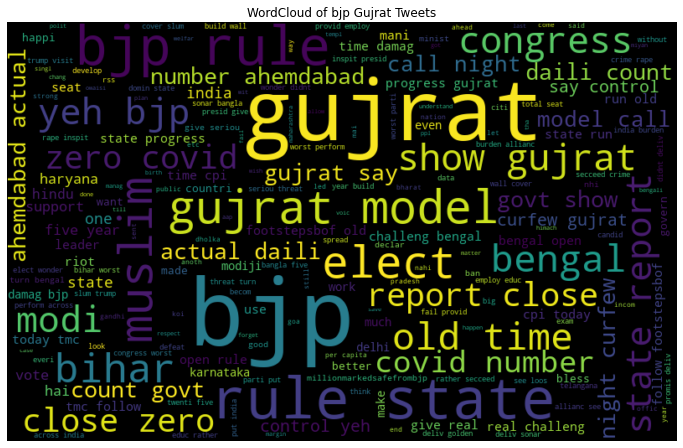

In [56]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of bjp Gujrat Tweets")
plt.show()

In [57]:
from textblob import TextBlob
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

155

In [58]:
len(text)

3054

In [59]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 59
Negative Tweets: 34
Neutral Tweets 62


In [60]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [61]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [62]:
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

,Negative,Neutral,Positive,Compound
0,0.000,1.000,0.000,0.0000
1,0.000,1.000,0.000,0.0000
2,0.000,0.859,0.141,0.2023
3,0.000,0.700,0.300,0.8519
4,0.000,0.700,0.300,0.8519
...,...,...,...,...
150,0.277,0.723,0.000,-0.7096
151,0.159,0.841,0.000,-0.5574
152,0.000,0.784,0.216,0.5106
153,0.069,0.840,0.091,0.1561


In [63]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.0,1.000,0.000,0.0000,Neutral
1,0.0,1.000,0.000,0.0000,Neutral
2,0.0,0.859,0.141,0.2023,Positive
3,0.0,0.700,0.300,0.8519,Positive
4,0.0,0.700,0.300,0.8519,Positive


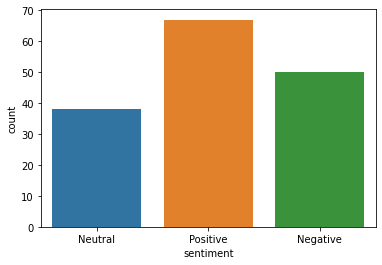

In [64]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)

In [67]:
filepath = r"/content/Election-Prediction/StatewisePolitics/Gujarat/bjp_gujrat.csv"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df.head(12)
len(emolex_df)

292

In [68]:
emotions={'positive':0, 'negative':0, 'surprise':0,'sadness':0,
          'anger':0,'joy':0,'negative':0,'trust':0,'fear':0,'anticipation':0,'disgust':0}

In [69]:
word_emotion=dict()
for i in range(0,292):
    emotion=emolex_df['emotion'][i]
    word=emolex_df['word'][i]
    association=emolex_df['association'][i]
    
    if word not in word_emotion:
        word_emotion[word]=dict()
    word_emotion[word][emotion]=association


In [71]:
from numpy import nan
nan == nan


False

In [74]:
for i in range(0,155):
    text=df['Tweet'][i]
    for j in text.split():
        if j in word_emotion:
            for k in word_emotion[j]:
                emotions[k]+=word_emotion[j][k]

KeyError: ignored

In [75]:
emotions

{'anger': 0,
 'anticipation': 0,
 'disgust': 0,
 'fear': 0,
 'joy': 0,
 'negative': 0,
 'positive': 0,
 'sadness': 0,
 'surprise': 0,
 'trust': 0}

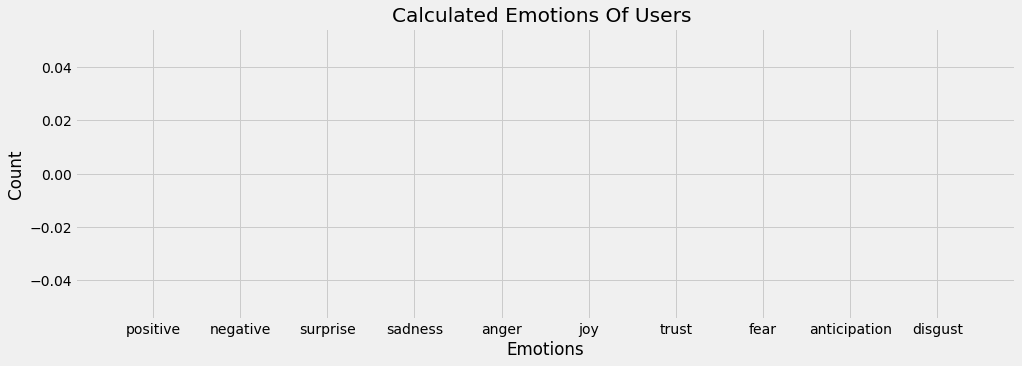

In [76]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,5]
plt.bar(list(emotions.keys()),list(emotions.values()),color='red',alpha = 0.6)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Calculated Emotions Of Users ')
plt.show()

In [77]:
df.Location  = df.Location.fillna('INDIA')
f = [i for i in df['Location'] if type(i) != str]
f

[]

In [78]:
df.Location = df.Location.apply(lambda x: x.replace('United States','USA'))
df.Location.value_counts()

                                  70
India                             27
New Delhi, India                   4
Mumbai, India                      4
Kolkata, India                     4
Mumbai                             3
Mumbai                             2
NY, USA | Kashmir                  2
Bharat                             2
Kolkata                            1
Bengaluru, India                   1
Kharghar, Panvel                   1
Kolkata , West Bengal              1
महाराष्ट्र, भारत                   1
Cloud 9                            1
Jaipur, India                      1
Doha, Qatar                        1
Salkia, Haora                      1
Chennai, India                     1
Jodhpur,Rajasthan                  1
The Seven Seas                     1
india                              1
Pimpri, Haveli                     1
Durgapur, West Bengal, India       1
Delhi                              1
Manbazar,Purulia,West Bengal       1
Jammu And Kashmir                  1
L

In [79]:
locations = []
locations_1 = []

locations = [i.split(',')[-1] for i in df['Location']]
locations_1 =  [i.split(',')[0] for i in df['Location']]
df['Processed_Location'] = locations_1
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location
0,2020-11-21 17:13:01,1330197537739993091,False,Uttrakhand Election\nBJP - 70(Total Seats) - 3...,Harishc94614675,,Twitter Web App,0,1,63,0,"[uttrakhand, electionbjp, total, seat, congres...",
1,2020-11-21 16:52:11,1330192296390881282,False,@SaketGokhale @PriyankKharge Yes in 2014 when ...,bhasad__,Mumbai,Twitter for Android,14,4,135,0,"[charg, got, bengal, made, histori, maharashtr...",Mumbai
2,2020-11-21 16:48:25,1330191345596706818,False,@84nanikiran @varunsankineni @KTRTRS @BJP4Tela...,KirtanHora,India,Twitter for Android,0,75,319,0,"[bjp, rule, state, filthi, citi, gujrat, come,...",India
3,2020-11-21 15:40:49,1330174333457666049,False,@aajtak @journovidya BJP shall give real chall...,VasudevSeth,,Twitter for Android,0,25,119,0,"[bjp, shall, give, real, challeng, bengal, ope...",
4,2020-11-21 15:40:36,1330174278688518147,False,@aajtak @AkhileshPSingh @sambitswaraj @anjanao...,VasudevSeth,,Twitter for Android,0,25,119,0,"[bjp, shall, give, real, challeng, bengal, ope...",
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2020-11-15 14:02:42,1327975314069147648,False,@Noor__Maryam So don't blame Owaisi on Ur defe...,Amir_Khatana_,Jammu And Kashmir,Twitter for Android,0,1853,1149,0,"[blame, owaisi, defeat, strike, rate, seat, bi...",Jammu And Kashmir
151,2020-11-15 13:16:23,1327963660673839106,False,@zafarsareshwala @BJP4India This zameerfarosh ...,KhanSaheb_1,India,Twitter for Android,12,905,3407,3,"[zameerfarosh, justifi, detent, center, muslim...",India
152,2020-11-15 12:30:33,1327952124735614976,False,@rajkuma04775211 @AshwiniBJP Congress minister...,veenadsharma45,,Twitter for Android,0,796,715,0,"[congress, minist, maharastra, gujrat, connect...",
153,2020-11-15 12:11:00,1327947206360399873,False,"@zafarsareshwala @BJP4India Sir, You rightly s...",AjayPremKaushal,"Jaipur, India",Twitter for Android,7,252,741,1,"[sir, rightli, said, muslim, prosper, gujrat, ...",Jaipur


In [80]:
df1 = df
df1['sentiment'] = sentimental_score_df['val']

In [82]:
df1.to_csv('Location.csv',index = False)
df1['day'] = df.Date.dt.day
df1.head()

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day
0,2020-11-21 17:13:01,1330197537739993091,False,Uttrakhand Election\nBJP - 70(Total Seats) - 3...,Harishc94614675,,Twitter Web App,0,1,63,0,"[uttrakhand, electionbjp, total, seat, congres...",,Neutral,21
1,2020-11-21 16:52:11,1330192296390881282,False,@SaketGokhale @PriyankKharge Yes in 2014 when ...,bhasad__,Mumbai,Twitter for Android,14,4,135,0,"[charg, got, bengal, made, histori, maharashtr...",Mumbai,Neutral,21
2,2020-11-21 16:48:25,1330191345596706818,False,@84nanikiran @varunsankineni @KTRTRS @BJP4Tela...,KirtanHora,India,Twitter for Android,0,75,319,0,"[bjp, rule, state, filthi, citi, gujrat, come,...",India,Positive,21
3,2020-11-21 15:40:49,1330174333457666049,False,@aajtak @journovidya BJP shall give real chall...,VasudevSeth,,Twitter for Android,0,25,119,0,"[bjp, shall, give, real, challeng, bengal, ope...",,Positive,21
4,2020-11-21 15:40:36,1330174278688518147,False,@aajtak @AkhileshPSingh @sambitswaraj @anjanao...,VasudevSeth,,Twitter for Android,0,25,119,0,"[bjp, shall, give, real, challeng, bengal, ope...",,Positive,21


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


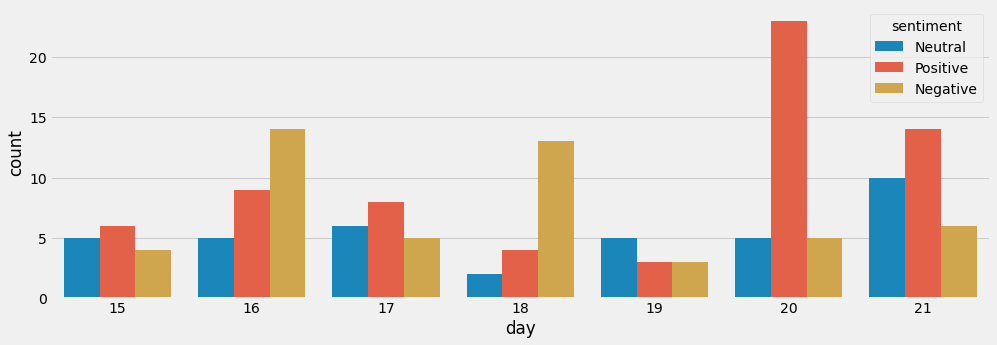

In [84]:
sns.countplot(df['day'],hue = df['sentiment'])

In [85]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [86]:
le = LabelEncoder() 
  
df1['sentiment_1']= le.fit_transform(df1['sentiment'])
df1

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day,sentiment_1
0,2020-11-21 17:13:01,1330197537739993091,False,Uttrakhand Election\nBJP - 70(Total Seats) - 3...,Harishc94614675,,Twitter Web App,0,1,63,0,"[uttrakhand, electionbjp, total, seat, congres...",,Neutral,21,1
1,2020-11-21 16:52:11,1330192296390881282,False,@SaketGokhale @PriyankKharge Yes in 2014 when ...,bhasad__,Mumbai,Twitter for Android,14,4,135,0,"[charg, got, bengal, made, histori, maharashtr...",Mumbai,Neutral,21,1
2,2020-11-21 16:48:25,1330191345596706818,False,@84nanikiran @varunsankineni @KTRTRS @BJP4Tela...,KirtanHora,India,Twitter for Android,0,75,319,0,"[bjp, rule, state, filthi, citi, gujrat, come,...",India,Positive,21,2
3,2020-11-21 15:40:49,1330174333457666049,False,@aajtak @journovidya BJP shall give real chall...,VasudevSeth,,Twitter for Android,0,25,119,0,"[bjp, shall, give, real, challeng, bengal, ope...",,Positive,21,2
4,2020-11-21 15:40:36,1330174278688518147,False,@aajtak @AkhileshPSingh @sambitswaraj @anjanao...,VasudevSeth,,Twitter for Android,0,25,119,0,"[bjp, shall, give, real, challeng, bengal, ope...",,Positive,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2020-11-15 14:02:42,1327975314069147648,False,@Noor__Maryam So don't blame Owaisi on Ur defe...,Amir_Khatana_,Jammu And Kashmir,Twitter for Android,0,1853,1149,0,"[blame, owaisi, defeat, strike, rate, seat, bi...",Jammu And Kashmir,Negative,15,0
151,2020-11-15 13:16:23,1327963660673839106,False,@zafarsareshwala @BJP4India This zameerfarosh ...,KhanSaheb_1,India,Twitter for Android,12,905,3407,3,"[zameerfarosh, justifi, detent, center, muslim...",India,Negative,15,0
152,2020-11-15 12:30:33,1327952124735614976,False,@rajkuma04775211 @AshwiniBJP Congress minister...,veenadsharma45,,Twitter for Android,0,796,715,0,"[congress, minist, maharastra, gujrat, connect...",,Positive,15,2
153,2020-11-15 12:11:00,1327947206360399873,False,"@zafarsareshwala @BJP4India Sir, You rightly s...",AjayPremKaushal,"Jaipur, India",Twitter for Android,7,252,741,1,"[sir, rightli, said, muslim, prosper, gujrat, ...",Jaipur,Positive,15,2


In [87]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(all_words).toarray()
y = df1['sentiment_1']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# NEGATIVE == 0
# NEUTRAL == 1
# POSITIVE == 2

In [89]:
#X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3, random_state = 0)

In [90]:
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)
y_pred_DT = classifier_DT.predict(X_test)

In [91]:
accuracy_score_DT = accuracy_score(y_test, y_pred_DT)
precision_score_DT = precision_score(y_test, y_pred_DT , average = 'micro')
recall_score_DT = recall_score(y_test, y_pred_DT , average = 'micro')
f1_score_DT = f1_score(y_test, y_pred_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_DT)
print("Precision Score: " , precision_score_DT)
print("Recall Score: " , recall_score_DT)
print("F1 Score: " , f1_score_DT)

Accuracy Score:  0.5531914893617021
Precision Score:  0.5531914893617021
Recall Score:  0.5531914893617021
F1 Score:  0.5531914893617021


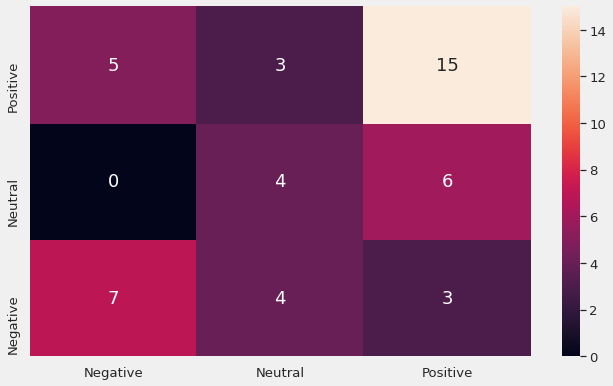

In [92]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

      # neg # neutr  # pos
# pos #  232   65      1397
# neu #  87   1175     51
# neg # 1104   82      321

df_cm_DT = pd.DataFrame(cm_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [93]:
#Getting the parameters of the particular model 
classifier_DT.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [94]:
classifier_DT_opti = DecisionTreeClassifier() 

param_grid = {"max_depth" : [1,3,5,7],     #Setting the parameters for the model
               "criterion" : ["gini","entropy"],
              "min_samples_split" : [2,3,4],
              "max_leaf_nodes" : [7,8,9],
              "min_samples_leaf": [2,3,4],
             }

In [96]:
model_DT = model_selection.GridSearchCV(estimator=classifier_DT_opti, #GridSearch
                                    param_grid=param_grid, 
                                        cv=10)
model_DT.fit(X_train,y_train)
print(model_DT.best_score_) #Gives the best score of the model
print(model_DT.best_estimator_.get_params()) #Gives the best parameters

0.5054545454545454
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': 8, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [98]:
y_pred_model_DT = model_DT.predict(X_test)

accuracy_score_model_DT = accuracy_score(y_test, y_pred_model_DT)
precision_score_model_DT = precision_score(y_test, y_pred_model_DT , average = 'micro')
recall_score_model_DT = recall_score(y_test, y_pred_model_DT , average = 'micro')
f1_score_model_DT = f1_score(y_test, y_pred_model_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_DT)
print("Precision Score: " , precision_score_model_DT)
print("Recall Score: " , recall_score_model_DT)
print("F1 Score: " , f1_score_model_DT)

Accuracy Score:  0.40425531914893614
Precision Score:  0.40425531914893614
Recall Score:  0.40425531914893614
F1 Score:  0.40425531914893614


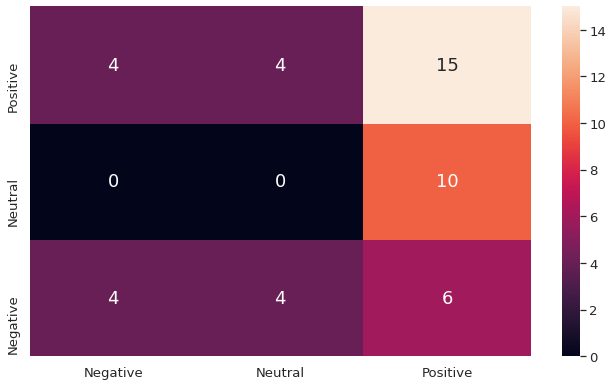

In [99]:
cm_model_DT = confusion_matrix(y_test, y_pred_model_DT)

df_cm_model_DT = pd.DataFrame(cm_model_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [100]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)

In [101]:
accuracy_score_RF = accuracy_score(y_test, y_pred_RF)
precision_score_RF = precision_score(y_test, y_pred_RF , average = 'micro')
recall_score_RF = recall_score(y_test, y_pred_RF, average = 'micro')
f1_score_RF = f1_score(y_test, y_pred_RF, average = 'micro')
print("Accuracy Score: " , accuracy_score_RF)
print("Precision Score: " , precision_score_RF)
print("Recall Score: " , recall_score_RF)
print("F1 Score: " , f1_score_RF)

Accuracy Score:  0.5531914893617021
Precision Score:  0.5531914893617021
Recall Score:  0.5531914893617021
F1 Score:  0.5531914893617021


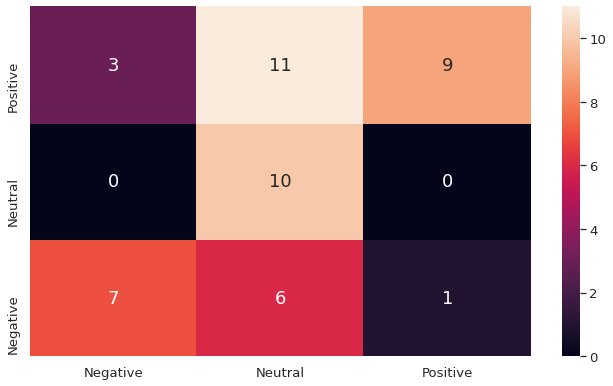

In [102]:
cm_RF = confusion_matrix(y_test, y_pred_RF)

df_cm_RF = pd.DataFrame(cm_RF, range(3), range(3))
categories = ['Negative','Neutral','Positive']
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [103]:
#Getting the parameters of the particular model 
classifier_RF.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [104]:
classifier_RF_opti = RandomForestClassifier()
param_grid = {"n_estimators": np.arange(100,1500,100), #Selecting the parameters
               "max_depth": np.arange(1,20),
               "criterion": ["gini","entropy"], 
              }

classifier_model_RF = model_selection.RandomizedSearchCV(estimator=classifier_RF_opti, #RandomizedSearch
                                    param_distributions=param_grid,
                                    n_iter=10,
                                    scoring='accuracy',
                                    verbose=10,
                                    n_jobs=1,
                                    cv=5)

classifier_model_RF.fit(X_train,y_train)
print(classifier_model_RF.best_score_) #Gives the best score of the model
print(classifier_model_RF.best_estimator_.get_params()) #Gives the best parameters of the model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=400, max_depth=7, criterion=entropy ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, max_depth=7, criterion=entropy, score=0.455, total=   0.5s
[CV] n_estimators=400, max_depth=7, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=400, max_depth=7, criterion=entropy, score=0.455, total=   0.5s
[CV] n_estimators=400, max_depth=7, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=400, max_depth=7, criterion=entropy, score=0.545, total=   0.6s
[CV] n_estimators=400, max_depth=7, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s


[CV]  n_estimators=400, max_depth=7, criterion=entropy, score=0.667, total=   0.5s
[CV] n_estimators=400, max_depth=7, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s


[CV]  n_estimators=400, max_depth=7, criterion=entropy, score=0.667, total=   0.5s
[CV] n_estimators=700, max_depth=6, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.7s remaining:    0.0s


[CV]  n_estimators=700, max_depth=6, criterion=gini, score=0.455, total=   0.9s
[CV] n_estimators=700, max_depth=6, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.6s remaining:    0.0s


[CV]  n_estimators=700, max_depth=6, criterion=gini, score=0.455, total=   0.9s
[CV] n_estimators=700, max_depth=6, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.5s remaining:    0.0s


[CV]  n_estimators=700, max_depth=6, criterion=gini, score=0.409, total=   0.9s
[CV] n_estimators=700, max_depth=6, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.4s remaining:    0.0s


[CV]  n_estimators=700, max_depth=6, criterion=gini, score=0.619, total=   0.9s
[CV] n_estimators=700, max_depth=6, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.3s remaining:    0.0s


[CV]  n_estimators=700, max_depth=6, criterion=gini, score=0.619, total=   0.9s
[CV] n_estimators=200, max_depth=16, criterion=entropy ...............
[CV]  n_estimators=200, max_depth=16, criterion=entropy, score=0.455, total=   0.3s
[CV] n_estimators=200, max_depth=16, criterion=entropy ...............
[CV]  n_estimators=200, max_depth=16, criterion=entropy, score=0.500, total=   0.3s
[CV] n_estimators=200, max_depth=16, criterion=entropy ...............
[CV]  n_estimators=200, max_depth=16, criterion=entropy, score=0.545, total=   0.3s
[CV] n_estimators=200, max_depth=16, criterion=entropy ...............
[CV]  n_estimators=200, max_depth=16, criterion=entropy, score=0.571, total=   0.3s
[CV] n_estimators=200, max_depth=16, criterion=entropy ...............
[CV]  n_estimators=200, max_depth=16, criterion=entropy, score=0.524, total=   0.3s
[CV] n_estimators=500, max_depth=9, criterion=gini ...................
[CV]  n_estimators=500, max_depth=9, criterion=gini, score=0.455, total=  

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   47.7s finished


0.5575757575757575
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [105]:
y_pred_model_RF = classifier_model_RF.predict(X_test)

accuracy_score_model_RF = accuracy_score(y_test, y_pred_model_RF)
precision_score_model_RF = precision_score(y_test, y_pred_model_RF , average = 'micro')
recall_score_model_RF = recall_score(y_test, y_pred_model_RF , average = 'micro')
f1_score_model_RF = f1_score(y_test, y_pred_model_RF , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_RF)
print("Precision Score: " , precision_score_model_RF)
print("Recall Score: " , recall_score_model_RF)
print("F1 Score: " , f1_score_model_RF)

Accuracy Score:  0.5531914893617021
Precision Score:  0.5531914893617021
Recall Score:  0.5531914893617021
F1 Score:  0.5531914893617021


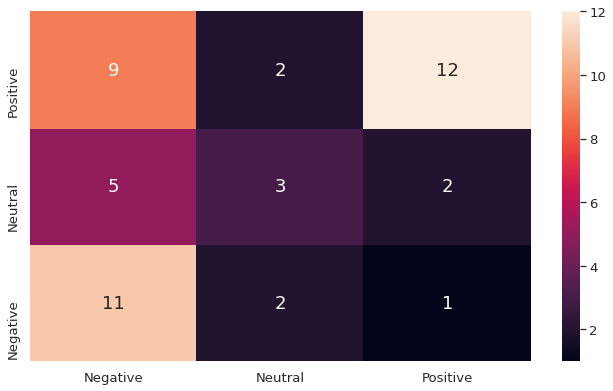

In [106]:
cm_model_RF = confusion_matrix(y_test, y_pred_model_RF)

df_cm_model_RF = pd.DataFrame(cm_model_RF, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [107]:
classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)
y_pred_NB = classifier_NB.predict(X_test)

accuracy_score_NB = accuracy_score(y_test, y_pred_NB)
precision_score_NB = precision_score(y_test, y_pred_NB , average = 'micro')
recall_score_NB = recall_score(y_test, y_pred_NB, average = 'micro')
f1_score_NB = f1_score(y_test, y_pred_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_NB)
print("Precision Score: " , precision_score_NB)
print("Recall Score: " , recall_score_NB)
print("F1 Score: " , f1_score_NB)

Accuracy Score:  0.574468085106383
Precision Score:  0.574468085106383
Recall Score:  0.574468085106383
F1 Score:  0.574468085106383


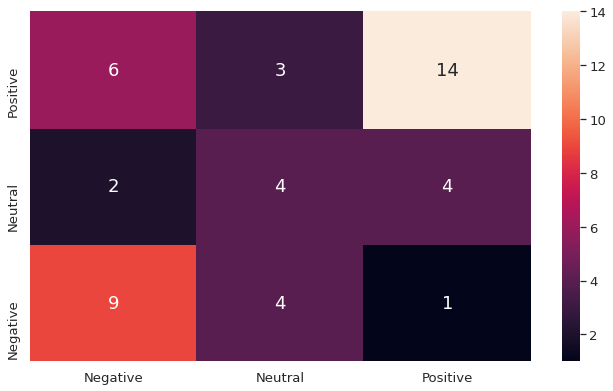

In [108]:
cm_NB = confusion_matrix(y_test, y_pred_NB)

df_cm_NB = pd.DataFrame(cm_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [109]:
#Getting the parameters of the particular model 
classifier_NB.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [110]:
classifier_NB_opti = MultinomialNB() #Using the MultinomialNB
param_grid = {'alpha':[1,2,3,4], } #Selecting the parameters

classifier_model_NB = model_selection.GridSearchCV(estimator=classifier_NB_opti, #GridSearch
                                    param_grid=param_grid,
                                        cv=10)
classifier_model_NB.fit(X_train,y_train)
print(classifier_model_NB.best_score_) #Gives the best score of the model
print(classifier_model_NB.best_estimator_.get_params()) #Gives the best parameters of the model

0.5936363636363636
{'alpha': 1, 'class_prior': None, 'fit_prior': True}


In [111]:
y_pred_model_NB = classifier_model_NB.predict(X_test)

accuracy_score_model_NB = accuracy_score(y_test, y_pred_model_NB)
precision_score_model_NB = precision_score(y_test, y_pred_model_NB , average = 'micro')
recall_score_model_NB = recall_score(y_test, y_pred_model_NB , average = 'micro')
f1_score_model_NB = f1_score(y_test, y_pred_model_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_model_NB)
print("Precision Score: " , precision_score_model_NB)
print("Recall Score: " , recall_score_model_NB)
print("F1 Score: " , f1_score_model_NB)

Accuracy Score:  0.574468085106383
Precision Score:  0.574468085106383
Recall Score:  0.574468085106383
F1 Score:  0.574468085106383


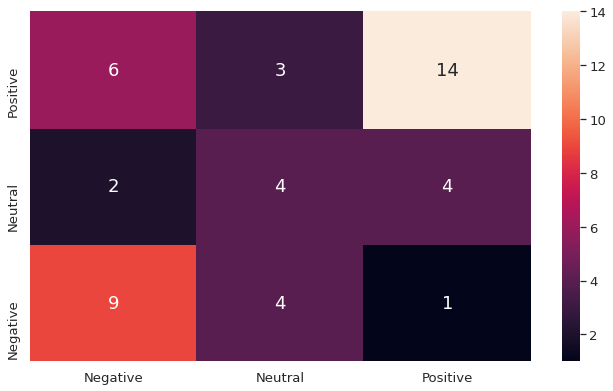

In [112]:
cm_model_NB = confusion_matrix(y_test, y_pred_model_NB)

df_cm_model_NB = pd.DataFrame(cm_model_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

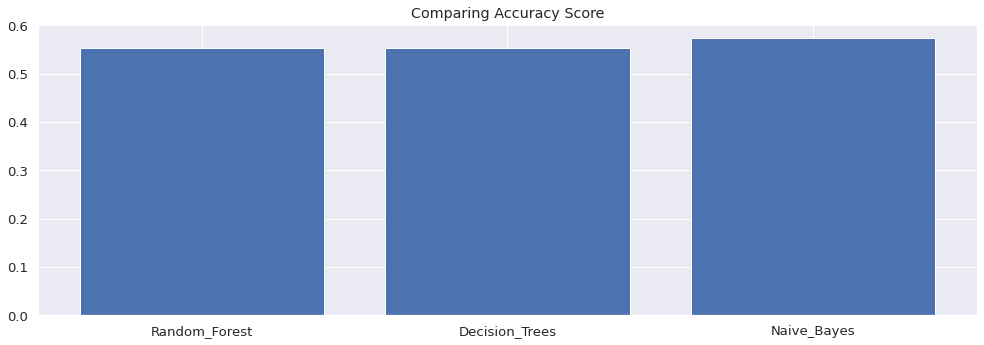

In [113]:
Accuracy = [accuracy_score_RF, accuracy_score_DT, accuracy_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing Accuracy Score')
plt.show()

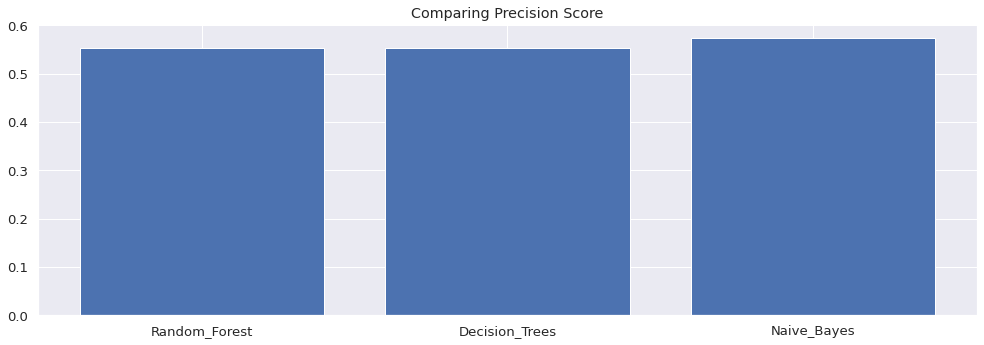

In [114]:
Precision = [precision_score_RF, precision_score_DT, precision_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Precision_pos = np.arange(len(Methods))
plt.bar(Precision_pos, Precision)
plt.xticks(Precision_pos, Methods)
plt.title('Comparing Precision Score')
plt.show()

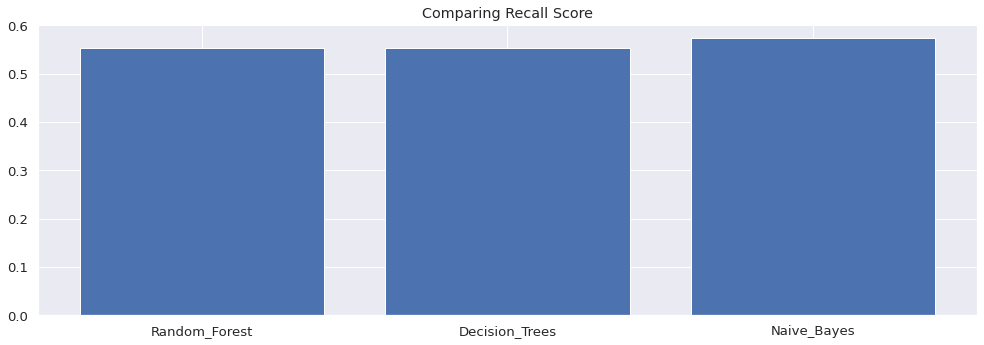

In [115]:
Recall = [recall_score_RF, recall_score_DT, recall_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Recall_pos = np.arange(len(Methods))
plt.bar(Recall_pos, Recall)
plt.xticks(Recall_pos, Methods)
plt.title('Comparing Recall Score')
plt.show()

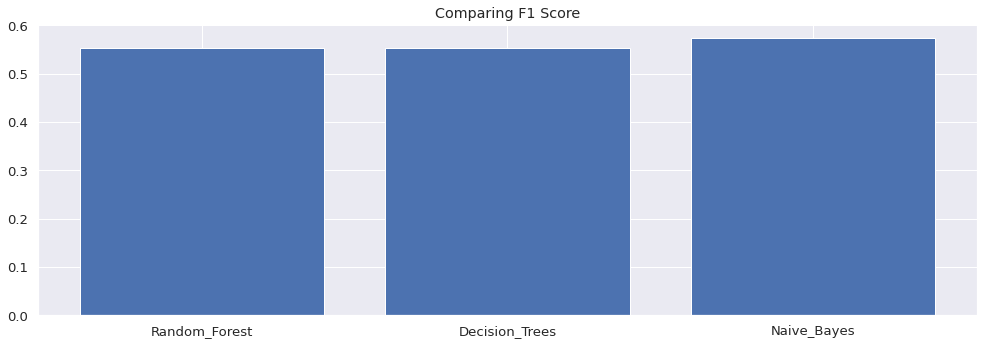

In [116]:

F1 = [f1_score_RF,f1_score_DT,f1_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
F1_pos = np.arange(len(Methods))
plt.bar(F1_pos, F1)
plt.xticks(F1_pos, Methods)
plt.title('Comparing F1 Score')
plt.show()